<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# Dealing with class imbalance - predicting insurance claims

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score,roc_auc_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Run this before any other code cell
# This downloads the csv data files into the same directory where you have saved this notebook

import urllib.request
from pathlib import Path
import os
path = Path()

# Dictionary of file names and download links
files = {'insurance_imbalance_train.csv':'https://storage.googleapis.com/aipi_datasets/insurance_imbalance_train.csv'}

# Download each file
for key,value in files.items():
    filename = path/key
    url = value
    # If the file does not already exist in the directory, download it
    if not os.path.exists(filename):
        urllib.request.urlretrieve(url,filename)

In [3]:
# Read in and display data
df = pd.read_csv('insurance_imbalance_train.csv')
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


Class 0: 573518
Class 1: 21694


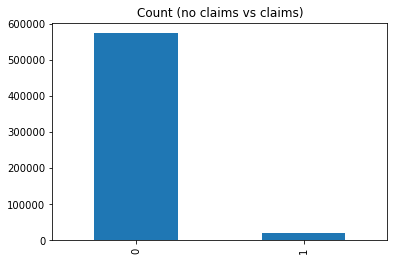

In [5]:
# Count the number of claims (1) vs no claims (0)
target_count = df.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])

target_count.plot(kind='bar', title='Count (no claims vs claims)');

## Model the full dataset

In [6]:
# Split the data into training and test sets
df_train, df_test = train_test_split(df,test_size=0.2,random_state=0)

# Split into X and y
X_train = df_train.iloc[:,2:]
y_train = df_train.loc[:,'target']
X_test = df_test.iloc[:,2:]
y_test = df_test.loc[:,'target']

# Fit a logistic regression classifier
model = LogisticRegression()
model.fit(X_train,y_train)

# Get predictions and calculate accuracy on test set
preds = model.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print('Accuracy: {:.2f}'.format(accuracy*100))
print('AUROC is {:.3f}'.format(roc_auc_score(y_test,preds)))

Accuracy: 96.38
AUROC is 0.500


In [7]:
zeros = np.count_nonzero(preds == 0)
ones = np.count_nonzero(preds == 1)
print('Predictions of Class 0:', zeros)
print('Predictions of Class 1:', ones)

Predictions of Class 0: 119043
Predictions of Class 1: 0


## Apply undersampling

17383


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
571681,1429282,0,1,1,4,0,0,0,0,1,...,1,1,3,7,0,1,1,1,0,0
470980,1177088,0,2,1,5,0,4,0,0,1,...,8,2,1,10,0,1,1,1,1,1
141215,352664,0,3,1,3,1,0,0,0,1,...,7,4,5,8,0,1,0,1,1,0
207218,517676,0,4,2,1,0,0,0,0,1,...,5,2,3,7,0,1,1,1,0,0
98075,245458,0,2,1,5,1,0,0,0,1,...,7,0,6,4,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341845,853994,1,0,2,1,1,0,0,1,0,...,10,1,2,6,0,1,0,0,1,0
378516,945963,1,2,1,3,1,0,0,1,0,...,5,2,1,7,0,0,1,0,0,0
505832,1264060,1,2,2,6,0,0,0,0,1,...,4,4,5,10,0,1,0,0,1,0
210932,526990,1,0,1,6,0,0,0,0,0,...,8,2,6,11,0,1,1,1,0,0


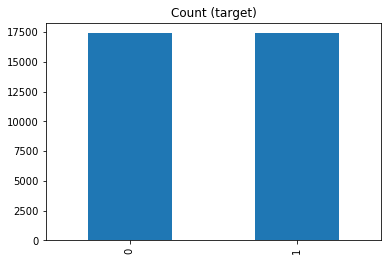

In [8]:
# Divide training data by class
df_class0 = df_train[df_train['target'] == 0]
df_class1 = df_train[df_train['target'] == 1]

# Count the number in each class
count_class0, count_class1 = df_train.target.value_counts()

print(count_class1)
# Resample class 0 so count is equal to class 1
df_class0_under = df_class0.sample(n=count_class1)

# Add the undersampled class 0 together with class 1
df_undersampled = pd.concat([df_class0_under,df_class1])
display(df_undersampled)
# Confirm equal counts of class 1 and class 0
df_undersampled.target.value_counts().plot(kind='bar', title='Count (target)')
plt.show()

In [9]:
# Set up data to input into model
X_train_undersampled = df_undersampled.iloc[:,2:]
y_train_undersampled = df_undersampled.loc[:,'target']

# Fit a logistic regression classifier
model2 = LogisticRegression()
model2.fit(X_train_undersampled,y_train_undersampled)

# Get predictions on the test set and calculate accuracy
preds2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test, preds2)
print('Accuracy: {:.2f}'.format(accuracy2*100))
print('AUROC is {:.3f}'.format(roc_auc_score(y_test,preds2)))

Accuracy: 62.47
AUROC is 0.585


In [10]:
zeros = np.count_nonzero(preds2 == 0)
ones = np.count_nonzero(preds2 == 1)
print('Predictions of Class 0:', zeros)
print('Predictions of Class 1:', ones)

Predictions of Class 0: 74001
Predictions of Class 1: 45042


## Apply oversampling

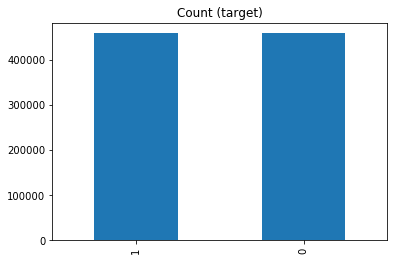

In [11]:
# Divide training data by class
df_class0 = df_train[df_train['target'] == 0]
df_class1 = df_train[df_train['target'] == 1]

# Count the number in each class
count_class0, count_class1 = df_train.target.value_counts()

# Resample class 1 so count is equal to class 0
df_class1_over = df_class1.sample(n=count_class0, replace=True)

# Add the oversampled class 1 together with class 0
df_oversampled = pd.concat([df_class1_over,df_class0])

# Confirm equal counts of class 1 and class 0
df_oversampled.target.value_counts().plot(kind='bar', title='Count (target)')
plt.show()

In [12]:
# Set up data to input into model
X_train_oversampled = df_oversampled.iloc[:,2:]
y_train_oversampled = df_oversampled.loc[:,'target']

# Fit a logistic regression classifier
model3 = LogisticRegression()
model3.fit(X_train_oversampled,y_train_oversampled)

# Get insample predictions on the test set and calculate accuracy
preds3 = model3.predict(X_test)
accuracy3 = accuracy_score(y_test, preds3)
print('Accuracy: {:.2f}'.format(accuracy3*100))
print('AUROC is {:.3f}'.format(roc_auc_score(y_test,preds3)))

Accuracy: 62.55
AUROC is 0.584


In [13]:
zeros = np.count_nonzero(preds3 == 0)
ones = np.count_nonzero(preds3 == 1)
print('Predictions of Class 0:', zeros)
print('Predictions of Class 1:', ones)

Predictions of Class 0: 74128
Predictions of Class 1: 44915


## Synthetic Minority Oversampling (SMOTE)

Chawla, Nitesh V., et al. "SMOTE: synthetic minority over-sampling technique." Journal of artificial intelligence research 16 (2002):
https://www.jair.org/media/953/live-953-2037-jair.pdf

<img align="left" style="padding-top:10px;" src="smote.png">  

In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

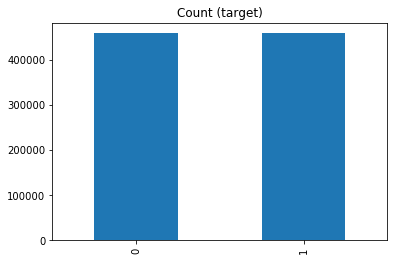

In [15]:
# Check counts of 0 and 1
y_sm.value_counts().plot(kind='bar', title='Count (target)')
plt.show()

In [16]:
# Fit a logistic regression classifier
model4 = LogisticRegression()
model4.fit(X_sm,y_sm)

# Get predictions on the test and calculate accuracy
preds4 = model4.predict(X_test)
accuracy4 = accuracy_score(y_test, preds4)
print('Accuracy: {:.2f}'.format(accuracy4*100))
print('AUROC is {:.3f}'.format(roc_auc_score(y_test,preds4)))

Accuracy: 86.02
AUROC is 0.513


In [17]:
zeros = np.count_nonzero(preds4 == 0)
ones = np.count_nonzero(preds4 == 1)
print('Predictions of Class 0:', zeros)
print('Predictions of Class 1:', ones)

Predictions of Class 0: 105514
Predictions of Class 1: 13529
